# Combination of p-values

The `MultipleTesting` package offers several established methods for combining independent p-values. This becomes relevant when testing a global hypothesis: As an example, we can think of a meta analysis based on a number of studies where each study gives us a single p-value pᵢ. Using a method for the combination of all p-values pᵢ, we can derive a global p-value p̃.

## Setting the scene

In [1]:
using MultipleTesting

In [2]:
using Gadfly

We can combine an arbitrarily large number of p-values, but let us start with the simplest case for our exploration: The combination of two p-values p₁ and p₂.

In [3]:
p_values = 0.01:0.01:0.99;

For each pair of p₁ and p₂, we compute a global p-value p̃ using different p-value combination methods of the package.

In [4]:
function combine_two_pvalues(p_values, combination)
    pc = [combine([p1, p2], combination) for p1 in p_values, p2 in p_values]
end

combine_two_pvalues (generic function with 1 method)

Looking at contour plots that show us the combined p-value p̃ depending on the two inputs p₁ and p₂, we can explore the properties and the differences of the various methods.

In [5]:
function plot_combined_pvalues_contour(pc, p_values, title)
    p = Gadfly.plot(z = pc, x = collect(p_values), y = collect(p_values),
             Geom.contour(levels = collect(0.1:0.1:1.0)),
             Guide.xticks(ticks = collect(0:0.2:1)), Guide.yticks(ticks = collect(0:0.2:1)),
             Guide.title(title),
             Guide.xlabel("p₁"), Guide.ylabel("p₂"),
             Guide.colorkey(title="p̃"),
             Coord.cartesian(fixed = true))
    f = draw(SVG(13cm, 13cm), p)
    return f
end

plot_combined_pvalues_contour (generic function with 1 method)

## Analysing different combination methods

### Fisher combination

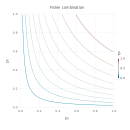

In [6]:
pc = combine_two_pvalues(p_values, FisherCombination())
plot_combined_pvalues_contour(pc, p_values, "Fisher combination")

### Tippett combination

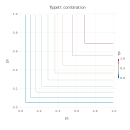

In [7]:
pc = combine_two_pvalues(p_values, TippettCombination())
plot_combined_pvalues_contour(pc, p_values, "Tippett combination")

### Simes combination

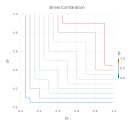

In [8]:
pc = combine_two_pvalues(p_values, SimesCombination())
plot_combined_pvalues_contour(pc, p_values, "Simes Combination")

### Stouffer combination

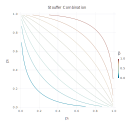

In [9]:
pc = combine_two_pvalues(p_values, StoufferCombination())
plot_combined_pvalues_contour(pc, p_values, "Stouffer Combination")

### Logit combination

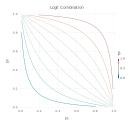

In [10]:
pc = combine_two_pvalues(p_values, LogitCombination())
plot_combined_pvalues_contour(pc, p_values, "Logit Combination")

### Wilkinson combination

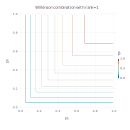

In [11]:
pc = combine_two_pvalues(p_values, WilkinsonCombination(1))
plot_combined_pvalues_contour(pc, p_values, "Wilkinson combination with rank=1")

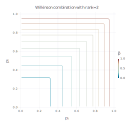

In [12]:
pc = combine_two_pvalues(p_values, WilkinsonCombination(2))
plot_combined_pvalues_contour(pc, p_values, "Wilkinson combination with rank=2")

### Minimum of adjusted p-values combination

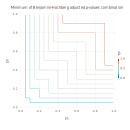

In [13]:
pc = combine_two_pvalues(p_values, MinimumCombination(BenjaminiHochberg()))
plot_combined_pvalues_contour(pc, p_values, "Minimum of Benjamini-Hochberg adjusted p-values combination")

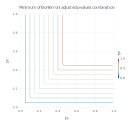

In [14]:
pc = combine_two_pvalues(p_values, MinimumCombination(Bonferroni()))
plot_combined_pvalues_contour(pc, p_values, "Minimum of Bonferroni adjusted p-values combination")